## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata.head()
study_results.head()

# Combine the data into a single dataset
mouse_data_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")



# Display the data table for preview
mouse_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
number_of_mice = len(mouse_data_df["Mouse ID"].unique())

number_of_mice = pd.DataFrame({"Total Mice": [number_of_mice]})


number_of_mice

,Total Mice
0,249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# mouse_data_df = mouse_data_df["Mouse ID"].unique()
# mouse_data_df[mouse_data_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
                                       
duplicate_mice = mouse_data_df.loc[mouse_data_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()

duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = mouse_data_df[mouse_data_df['Mouse ID'].isin(duplicate_mice)==False]

clean_mouse_df.head()




,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice in the clean DataFrame.

clean_final = clean_mouse_df["Mouse ID"].value_counts()
clean_final = len(clean_final)
clean_final

248

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

regimen_mean = clean_mouse_df.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]



regimen_median = clean_mouse_df.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]



regimen_variance = clean_mouse_df.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]



regimen_std = clean_mouse_df.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]


regimen_sem = clean_mouse_df.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]

#regimen_mean
#regimen_median
#regimen_variance
#regimen_std
#regimen_sem

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

summary_stats = pd.DataFrame({"Mean": regimen_mean, "Median":regimen_median, "Variance":regimen_variance, "Standard Deviation": regimen_std, "SEM": regimen_sem})

summary_stats


# Using the aggregation method, produce the same summary statistics in a single line
# single_group_by = clean_mouse_df.groupby('Drug Regimen')
# summary_stats1 = single_group_by.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
# summary_stats1

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.



In [ ]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.



In [21]:
#Have to count number of males/females first.
mouse_gender = clean_mouse_df.groupby(["Mouse ID","Sex"])

genders_df = pd.DataFrame(mouse_gender.size())

# New DF with gender counts
mouse_gender1 = pd.DataFrame(genders_df.groupby(["Sex"]).count())
mouse_gender1.columns = ["Total Count"]
#mouse_gender1

# create and format the percentage of female vs male
mouse_gender1["Percentage of Sex"] = (100*(mouse_gender1["Total Count"]/mouse_gender1["Total Count"].sum()))
mouse_gender1

# # format the "Percentage of Sex" column
# mouse_gender1["Percentage of Sex"] = mouse_gender1["Percentage of Sex"]


# mouse_gender1

,Total Count,Percentage of Sex
Sex,,
Female,123,49.596774
Male,125,50.403226


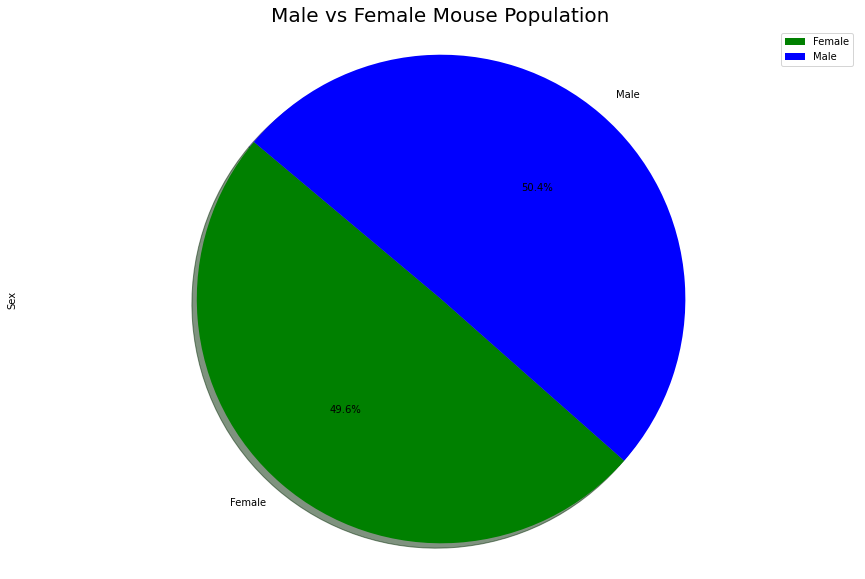

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

colors = ['green', 'blue']
# explode = (0.5, 0)
plot = mouse_gender1.plot.pie(y='Total Count',figsize=(15,10), colors = colors, startangle=140, shadow = True, autopct="%1.1f%%")

plt.title('Male vs Female Mouse Population',fontsize = 20)
plt.ylabel('Sex')
plt.axis("equal")

plt.show()


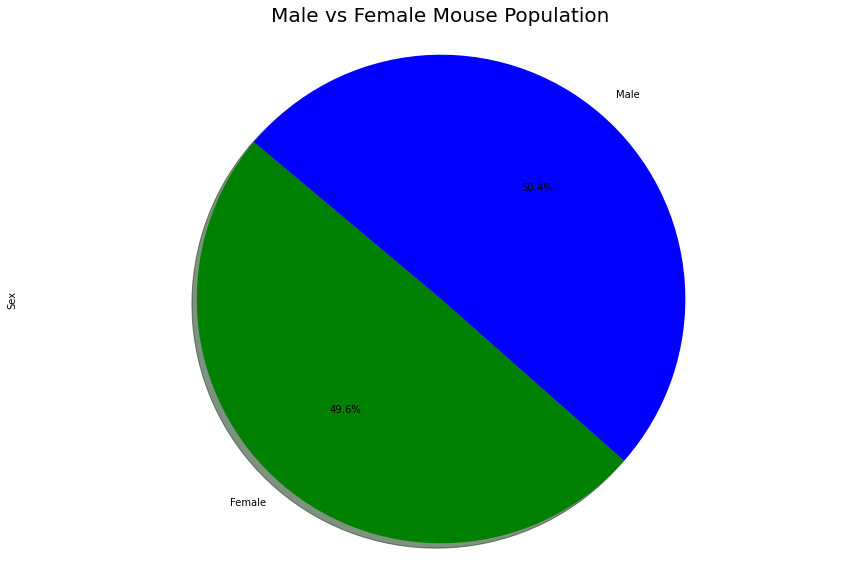

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female","Male"]

sizes = [49.596774,50.403226]

colors = ['green', 'blue']

fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140,)
plt.title('Male vs Female Mouse Population',fontsize = 20)
plt.ylabel('Sex')
plt.axis("equal")


plt.show()


## Quartiles, Outliers and Boxplots

In [45]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Getting dataframes with each drug. mostly because i needed it for scatterplots
capomulin_df = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Capomulin",:]
ramicane_df = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Ramicane",:]
infubinol_df = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Infubinol",:]
ceftamin_df = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == "Ceftamin",:]

# capomulin_df
# ramicane_df
# infubinol_df
# ceftamin_df


# Start by getting the last (greatest) timepoint for each mouse

# capomulin_last = capomulin_df.groupby('Mouse ID').max()['Timepoint']
# ramicane_last = ramicane_df.groupby('Mouse ID').max()['Timepoint']
# infubinol_last = infubinol_df.groupby('Mouse ID').max()['Timepoint']
# ceftamin_last = ceftamin_df.groupby('Mouse ID').max()['Timepoint']

# capomulin_last
# ramicane_last
# infubinol_last
# ceftamin_last

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

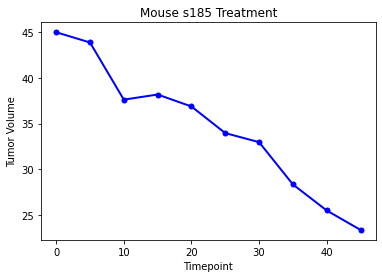

In [50]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
s185_df = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185",:]
s185_df.head(10)


x_axis = s185_df["Timepoint"]
tumor_size = s185_df["Tumor Volume (mm3)"]

plt.title("Mouse s185 Treatment")
plt.plot(x_axis, tumor_size ,linewidth=2, markersize=5, marker="o", color="blue")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")

plt.show()


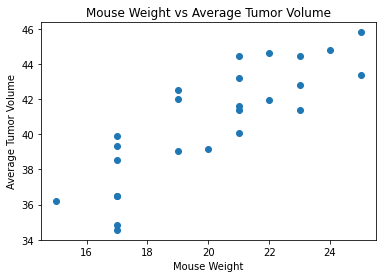

In [39]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_avg = capomulin_df.groupby(['Mouse ID']).mean()
#capomulin_avg


plt.scatter(capomulin_avg["Weight (g)"], capomulin_avg["Tumor Volume (mm3)"])
plt.title("Mouse Weight vs Average Tumor Volume")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")

plt.show()



## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
